In [17]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

data = pd.read_csv('Climate.csv')

print(data.head())

        Date  daily_rain  max_temp  min_temp
0  1/11/2021         0.0      18.6      10.6
1  2/11/2021         0.0      18.4      10.1
2  3/11/2021         0.0      20.2      12.9
3  4/11/2021         1.7      16.4      10.4
4  5/11/2021         0.0      17.2       7.3


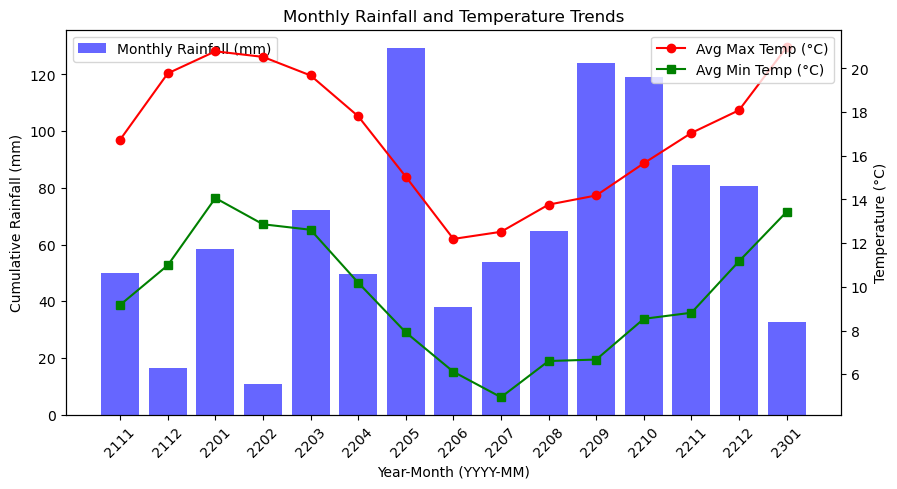

In [19]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Extract year and month, then format as YYMM
data['YYYY-MM'] = data['Date'].dt.strftime('%y%m')

# Group by YYMM and compute statistics
monthly_data = data.groupby('YYYY-MM').agg({
    'daily_rain': 'sum',   # Monthly cumulative rainfall
    'max_temp': 'mean',    # Average maximum temperature
    'min_temp': 'mean'     # Average minimum temperature
}).reset_index()

# Rename columns for clarity
monthly_data.rename(columns={'daily_rain': 'Monthly Rainfall (mm)',
                             'max_temp': 'Avg Max Temp (°C)',
                             'min_temp': 'Avg Min Temp (°C)'}, inplace=True)

# Plot the results
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot rainfall as a bar chart
ax1.bar(monthly_data['YYYY-MM'], monthly_data['Monthly Rainfall (mm)'], color='blue', alpha=0.6, label='Monthly Rainfall (mm)')
ax1.set_xlabel("Year-Month (YYYY-MM)")
ax1.set_ylabel("Cumulative Rainfall (mm)")
#ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

# Create a second y-axis for temperature
ax2 = ax1.twinx()
ax2.plot(monthly_data['YYYY-MM'], monthly_data['Avg Max Temp (°C)'], color='red', marker='o', label='Avg Max Temp (°C)')
ax2.plot(monthly_data['YYYY-MM'], monthly_data['Avg Min Temp (°C)'], color='green', marker='s', label='Avg Min Temp (°C)')
ax2.set_ylabel("Temperature (°C)", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.title("Monthly Rainfall and Temperature Trends")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\mnt\\data\\Monthly_Rainfall_Temperature.png'

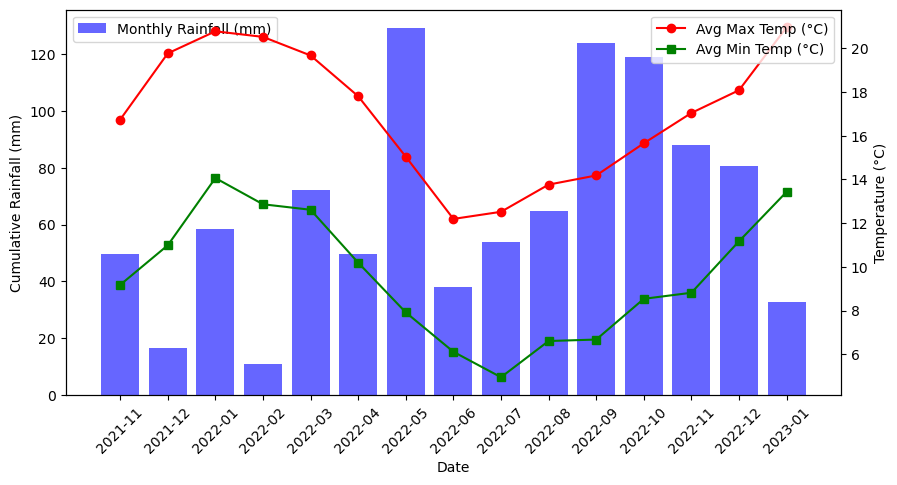

In [25]:
# Modify the date format to YYYY-MM instead of YYMM
data['YYYY-MM'] = data['Date'].dt.strftime('%Y-%m')

# Group by the new formatted date
monthly_data = data.groupby('YYYY-MM').agg({
    'daily_rain': 'sum',   # Monthly cumulative rainfall
    'max_temp': 'mean',    # Average maximum temperature
    'min_temp': 'mean'     # Average minimum temperature
}).reset_index()

# Rename columns for clarity
monthly_data.rename(columns={'daily_rain': 'Monthly Rainfall (mm)',
                             'max_temp': 'Avg Max Temp (°C)',
                             'min_temp': 'Avg Min Temp (°C)'}, inplace=True)

# Plot the results with updated date format
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot rainfall as a bar chart
ax1.bar(monthly_data['YYYY-MM'], monthly_data['Monthly Rainfall (mm)'], color='blue', alpha=0.6, label='Monthly Rainfall (mm)')
ax1.set_xlabel("Date")
ax1.set_ylabel("Cumulative Rainfall (mm)")
#ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

# Create a second y-axis for temperature
ax2 = ax1.twinx()
ax2.plot(monthly_data['YYYY-MM'], monthly_data['Avg Max Temp (°C)'], color='red', marker='o', label='Avg Max Temp (°C)')
ax2.plot(monthly_data['YYYY-MM'], monthly_data['Avg Min Temp (°C)'], color='green', marker='s', label='Avg Min Temp (°C)')
ax2.set_ylabel("Temperature (°C)", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Save the figure
plot_path = "/mnt/data/Monthly_Rainfall_Temperature.png"
#plt.title("Monthly Rainfall and Temperature Trends")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Provide the path to the saved figure
plot_path
